In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Hiển thị phân tích dữ liệu

In [58]:
df = pd.read_csv('results.csv')
df.head()

,Title,Author,Average rating,Number of ratings,Number of reviews,Genres,Publish year,Number of pages,Currently reading,Want to read
0,"The Law of Attraction (Lawyers in Love, #1)",N.M. Silber,3.76,11553,928.0,"Romance, Contemporary Romance, Contemporary, H...",2013.0,242.0,604.0,NaN
1,"Isle of Winds (The Changeling, #1)",James Fahy,4.27,1689,222.0,"Fantasy, Middle Grade, Young Adult, Fiction, M...",2015.0,265.0,485.0,NaN
2,Breaking Glass,Lisa Amowitz,3.83,504,105.0,"Young Adult, Mystery, Paranormal, Thriller, Fi...",2013.0,268.0,24.0,NaN
3,"Drowned Tomb (The Changeling, #2)",James Fahy,4.46,800,121.0,"Fantasy, Young Adult, Magic, Fiction",2016.0,NaN,100.0,NaN
4,"Chains of Gaia (The Changeling, #3)",James Fahy,4.59,695,115.0,"Fantasy, Young Adult, Fiction, Magic",2017.0,NaN,73.0,NaN


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              820 non-null    object 
 1   Author             820 non-null    object 
 2   Average rating     820 non-null    float64
 3   Number of ratings  820 non-null    int64  
 4   Number of reviews  779 non-null    float64
 5   Genres             759 non-null    object 
 6   Publish year       709 non-null    float64
 7   Number of pages    699 non-null    float64
 8   Currently reading  716 non-null    float64
 9   Want to read       17 non-null     float64
dtypes: float64(6), int64(1), object(3)
memory usage: 64.2+ KB


In [60]:
df.describe()

,Average rating,Number of ratings,Number of reviews,Publish year,Number of pages,Currently reading,Want to read
count,820.000000,820.000000,779.000000,709.000000,699.000000,716.000000,17.000000
mean,3.985537,9016.345122,747.548139,2011.796897,301.170243,456.216480,435.352941
std,0.305525,18655.265779,1418.572313,4.738464,111.605622,1298.295252,375.173783
min,2.430000,2.000000,0.000000,1965.000000,12.000000,1.000000,42.000000
25%,3.790000,174.000000,38.000000,2011.000000,236.000000,18.750000,97.000000
50%,3.970000,1728.500000,190.000000,2012.000000,298.000000,104.000000,386.000000
75%,4.180000,11321.000000,925.500000,2013.000000,365.500000,392.000000,610.000000
max,5.000000,353177.000000,19498.000000,2021.000000,1304.000000,19369.000000,1405.000000


In [61]:
for column in df.columns:
    print("statistic for column: ", column)
    print(df[column].describe())

statistic for column:  Title
count                                             820
unique                                            820
top       The Law of Attraction (Lawyers in Love, #1)
freq                                                1
Name: Title, dtype: object
statistic for column:  Author
count              820
unique             598
top       Karina Halle
freq                 9
Name: Author, dtype: object
statistic for column:  Average rating
count    820.000000
mean       3.985537
std        0.305525
min        2.430000
25%        3.790000
50%        3.970000
75%        4.180000
max        5.000000
Name: Average rating, dtype: float64
statistic for column:  Number of ratings
count       820.000000
mean       9016.345122
std       18655.265779
min           2.000000
25%         174.000000
50%        1728.500000
75%       11321.000000
max      353177.000000
Name: Number of ratings, dtype: float64
statistic for column:  Number of reviews
count      779.000000
mean       747.

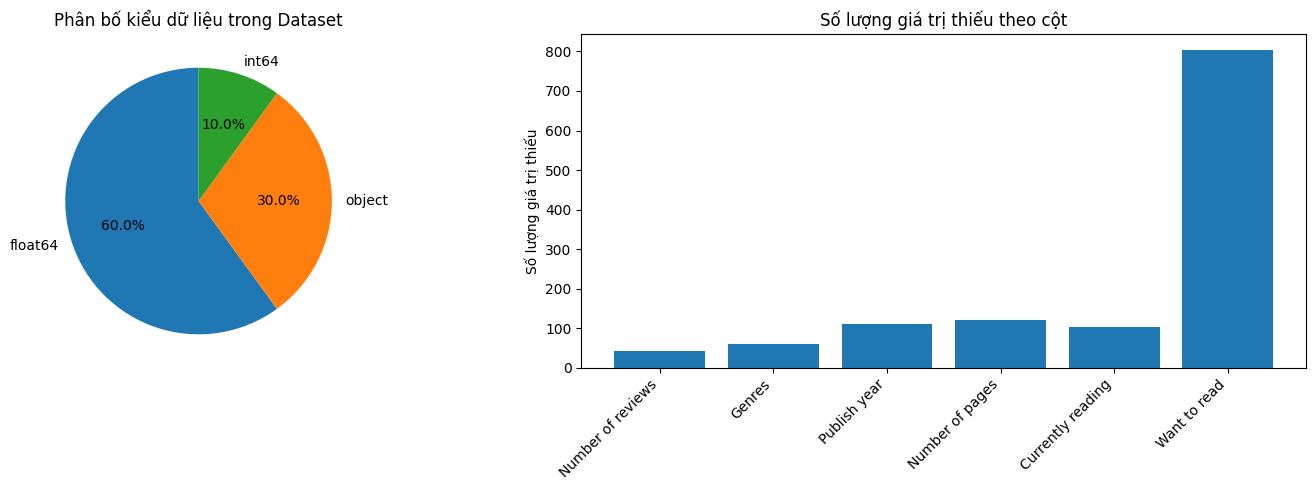

In [62]:
# Biểu đồ tổng quan về kiểu dữ liệu
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Biểu đồ kiểu dữ liệu
dtype_counts = df.dtypes.value_counts()
ax1.pie(dtype_counts.values, labels=dtype_counts.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Phân bố kiểu dữ liệu trong Dataset')

# Biểu đồ số lượng giá trị null
null_counts = df.isnull().sum()
non_null_cols = null_counts[null_counts > 0]
if len(non_null_cols) > 0:
    ax2.bar(range(len(non_null_cols)), non_null_cols.values)
    ax2.set_xticks(range(len(non_null_cols)))
    ax2.set_xticklabels(non_null_cols.index, rotation=45, ha='right')
    ax2.set_title('Số lượng giá trị thiếu theo cột')
    ax2.set_ylabel('Số lượng giá trị thiếu')
else:
    ax2.text(0.5, 0.5, 'Không có giá trị thiếu', ha='center', va='center', transform=ax2.transAxes)
    ax2.set_title('Giá trị thiếu')

plt.tight_layout()
plt.show()

# Xử lý dữ liệu

In [63]:
numeric_colums = df.select_dtypes(include=['float64']).columns
print("numeric_colums:", numeric_colums)


numeric_colums: Index(['Average rating', 'Number of reviews', 'Publish year',
       'Number of pages', 'Currently reading', 'Want to read'],
      dtype='object')


In [64]:
for column in numeric_colums:
    nuls = df[column].isnull().sum()
    if nuls > 0:
        median_val = df[column].median()
        df[column].fillna(median_val, inplace=True)
    print(f"Số giá trị null trong cột {column}: {nuls}")
    print(f"đã fillna bằng median cho cột {column}")
df.info()

Số giá trị null trong cột Average rating: 0
đã fillna bằng median cho cột Average rating
Số giá trị null trong cột Number of reviews: 41
đã fillna bằng median cho cột Number of reviews
Số giá trị null trong cột Publish year: 111
đã fillna bằng median cho cột Publish year
Số giá trị null trong cột Number of pages: 121
đã fillna bằng median cho cột Number of pages
Số giá trị null trong cột Currently reading: 104
đã fillna bằng median cho cột Currently reading
Số giá trị null trong cột Want to read: 803
đã fillna bằng median cho cột Want to read
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              820 non-null    object 
 1   Author             820 non-null    object 
 2   Average rating     820 non-null    float64
 3   Number of ratings  820 non-null    int64  
 4   Number of reviews  820 non-null    float64
 5   Genre

C:\Users\ADZ\AppData\Local\Temp\ipykernel_9948\2757922739.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(median_val, inplace=True)
C:\Users\ADZ\AppData\Local\Temp\ipykernel_9948\2757922739.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

In [65]:
# xử lý cột genres 
df['Genres'].fillna('Unknown',inplace=True)
df['MainGenre'] = df['Genres'].apply(lambda x: (x.split(',')[0]).strip() if x!= 'Unknown' else 'Unknown')
df.head()
df['MainGenre'].value_counts()

C:\Users\ADZ\AppData\Local\Temp\ipykernel_9948\2983405074.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Genres'].fillna('Unknown',inplace=True)


MainGenre
Romance             195
Fantasy             129
Young Adult         117
Paranormal           66
Unknown              61
                   ... 
Steampunk             1
Mystery Thriller      1
Short Stories         1
Memoir                1
Africa                1
Name: count, Length: 62, dtype: int64

In [66]:
# xóa cột want to read
df.drop(columns=["Want to read"],inplace= True)
df.drop(columns=["Genres"], inplace= True)
df.head()

,Title,Author,Average rating,Number of ratings,Number of reviews,Publish year,Number of pages,Currently reading,MainGenre
0,"The Law of Attraction (Lawyers in Love, #1)",N.M. Silber,3.76,11553,928.0,2013.0,242.0,604.0,Romance
1,"Isle of Winds (The Changeling, #1)",James Fahy,4.27,1689,222.0,2015.0,265.0,485.0,Fantasy
2,Breaking Glass,Lisa Amowitz,3.83,504,105.0,2013.0,268.0,24.0,Young Adult
3,"Drowned Tomb (The Changeling, #2)",James Fahy,4.46,800,121.0,2016.0,298.0,100.0,Fantasy
4,"Chains of Gaia (The Changeling, #3)",James Fahy,4.59,695,115.0,2017.0,298.0,73.0,Fantasy


In [67]:
# chuyển đổi kiểu dữ liệu 
for column in numeric_colums:
    if column != "Average rating" and column != "Want to read":
        df[column] = df[column].astype('int64')
df["MainGenre"] = df["MainGenre"].astype('category')
df.info()
    
        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Title              820 non-null    object  
 1   Author             820 non-null    object  
 2   Average rating     820 non-null    float64 
 3   Number of ratings  820 non-null    int64   
 4   Number of reviews  820 non-null    int64   
 5   Publish year       820 non-null    int64   
 6   Number of pages    820 non-null    int64   
 7   Currently reading  820 non-null    int64   
 8   MainGenre          820 non-null    category
dtypes: category(1), float64(1), int64(5), object(2)
memory usage: 54.7+ KB


# Xử lý ngoại lai


In [68]:
new_numeric_colums = [col for col in numeric_colums if col in df.columns]
print(f"new numeric_colums : {new_numeric_colums}")

new numeric_colums : ['Average rating', 'Number of reviews', 'Publish year', 'Number of pages', 'Currently reading']


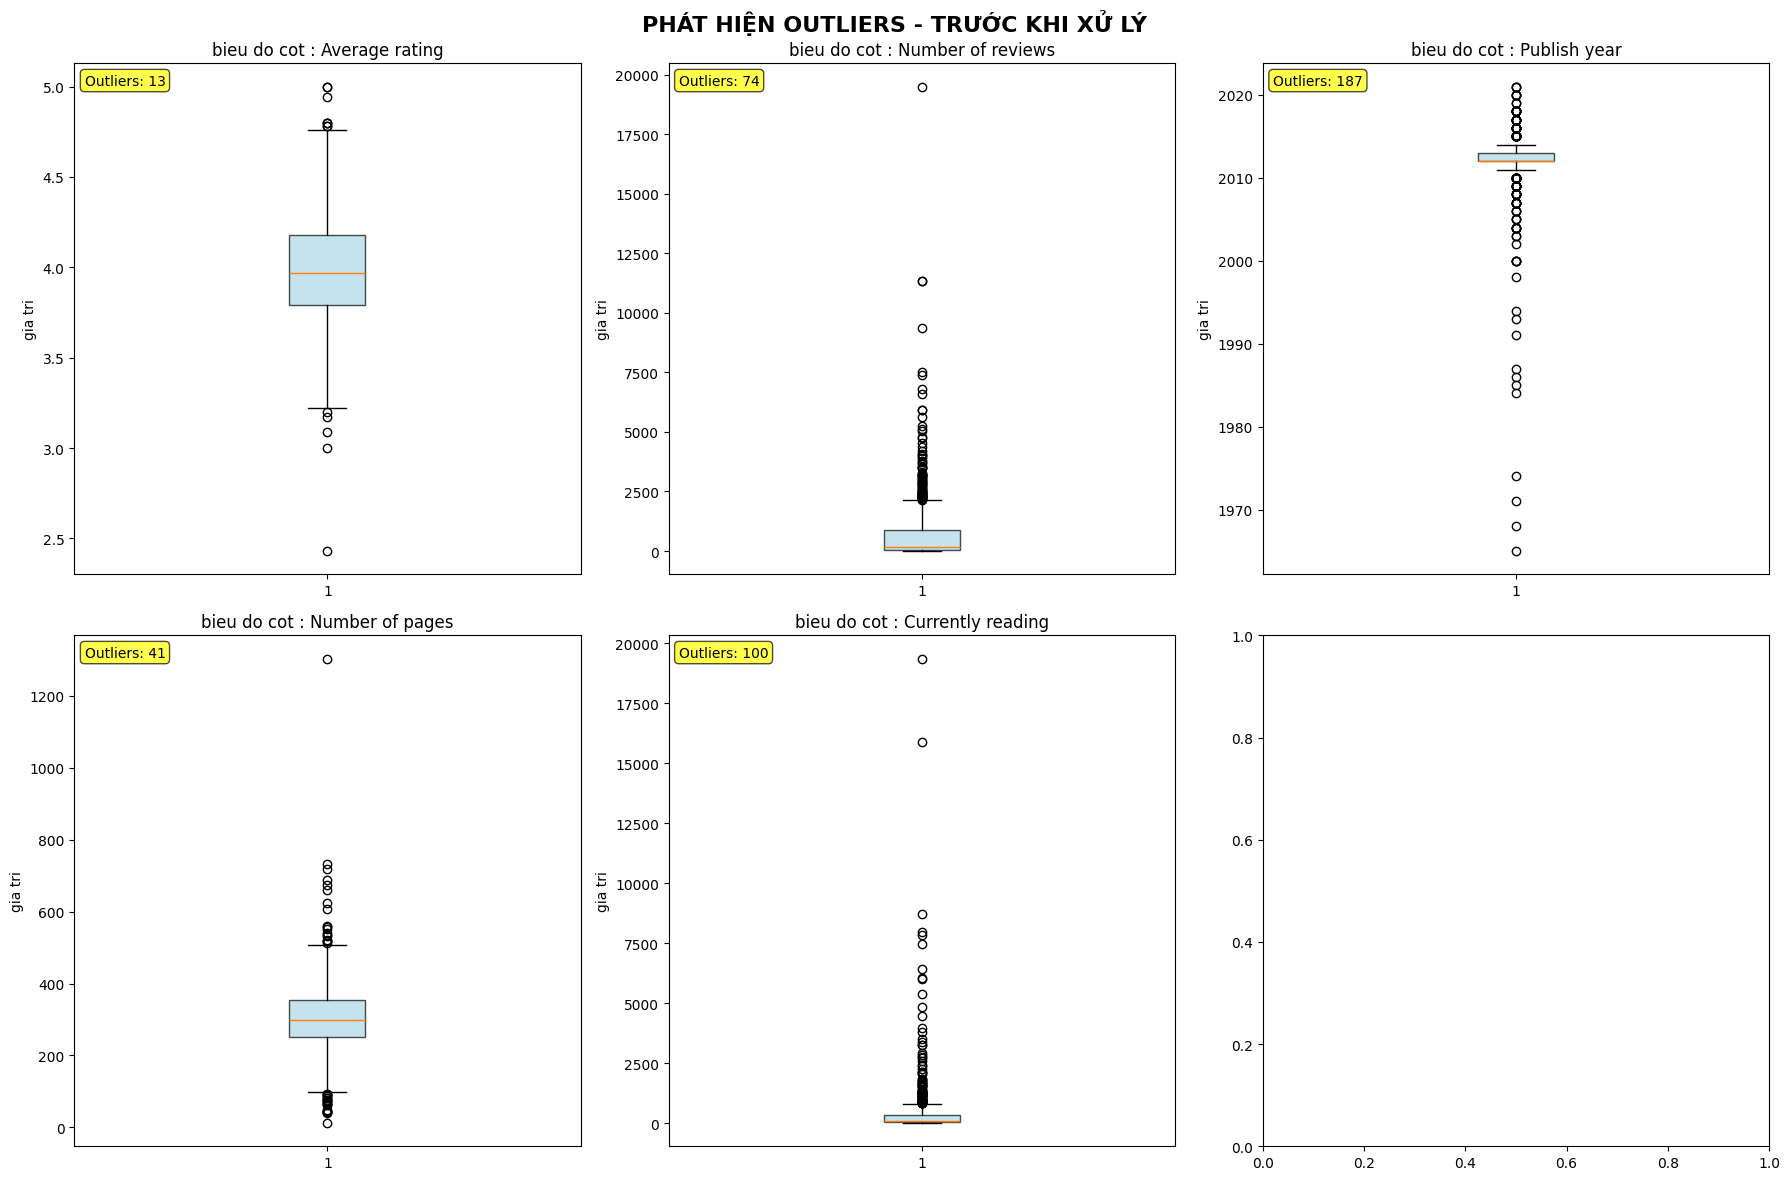

In [69]:
# Hàm phát hiện outliers bằng IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

# Trực quan hóa outliers trước khi xử lý
fig, axes = plt.subplots(2,3, figsize = (18,12))
axes = axes.flatten()

for i, colum in enumerate(new_numeric_colums):
    if i< len(axes):
        # boxplot hien thi outliers
        axes[i].boxplot(df[colum],patch_artist = True , boxprops = dict(facecolor = 'lightblue', alpha = 0.7))
        axes[i].set_title(f"bieu do cot : {colum}")
        axes[i].set_ylabel("gia tri")
        
        # hien thi so luong outliers
        outliers = detect_outliers_iqr((df[colum]))
        axes[i].text(0.02, 0.98, f'Outliers: {len(outliers)}', 
                    transform=axes[i].transAxes, verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))
    

plt.suptitle('PHÁT HIỆN OUTLIERS - TRƯỚC KHI XỬ LÝ', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

 Đã cap Average rating trong khoảng [3.50, 4.47]
 Đã cap Number of reviews trong khoảng [5.95, 2908.75]
 Đã cap Publish year trong khoảng [2008.00, 2016.00]
 Đã cap Number of pages trong khoảng [125.90, 457.05]
 Đã cap Currently reading trong khoảng [3.00, 1508.30]


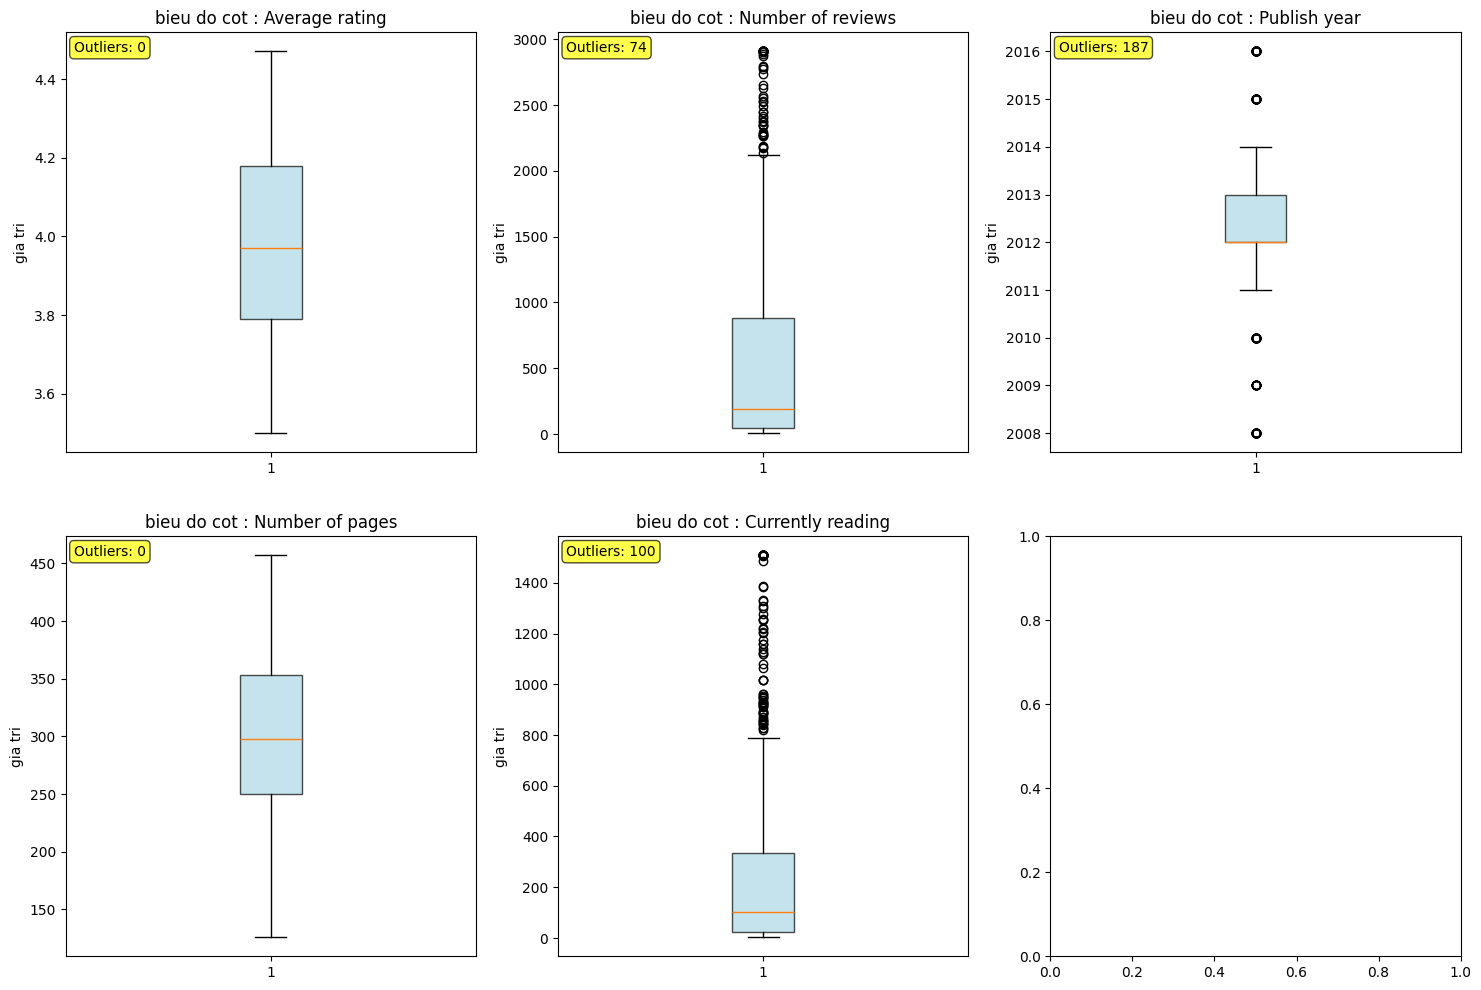

In [70]:
# xử lý outliers
for col in new_numeric_colums:
    outliers = detect_outliers_iqr(df[col])
    if len(outliers) > 0:
        upper_cap = df[col].quantile(0.95)
        lower_cap = df[col].quantile(0.05)
        df[col] = df[col].clip(lower=lower_cap, upper=upper_cap)
        print(f" Đã cap {col} trong khoảng [{lower_cap:.2f}, {upper_cap:.2f}]")

# Trực quan hóa outliers sau khi xử lý
fig, axes = plt.subplots(2,3, figsize = (18,12))
axes = axes.flatten()

for i, colum in enumerate(new_numeric_colums):
    if i< len(axes):
        # boxplot sau xu ly
        axes[i].boxplot(df[colum],patch_artist = True , boxprops = dict(facecolor = 'lightblue', alpha = 0.7))
        axes[i].set_title(f"bieu do cot : {colum}")
        axes[i].set_ylabel("gia tri")
        
        # hien thi so luong outliers
        outliers = detect_outliers_iqr((df[colum]))
        axes[i].text(0.02, 0.98, f'Outliers: {len(outliers)}', 
                    transform=axes[i].transAxes, verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

# chuan hoa du lieu

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


In [72]:
# Chuẩn hóa StandardScaler (Z-score normalization)
scaler_standard = StandardScaler()
df_numeric = df[new_numeric_colums]
df_scaled_standard = pd.DataFrame(
    scaler_standard.fit_transform(df_numeric),
    columns=[f"{col}_scaled" for col in new_numeric_colums],
    index=df.index
)
df_processed = pd.concat([df,df_scaled_standard], axis=1)
df_processed.head()

,Title,Author,Average rating,Number of ratings,Number of reviews,Publish year,Number of pages,Currently reading,MainGenre,Average rating_scaled,Number of reviews_scaled,Publish year_scaled,Number of pages_scaled,Currently reading_scaled
0,"The Law of Attraction (Lawyers in Love, #1)",N.M. Silber,3.7600,11553,928.0,2013,242.0,604.0,Romance,-0.836515,0.382224,0.435899,-0.671280,0.799825
1,"Isle of Winds (The Changeling, #1)",James Fahy,4.2700,1689,222.0,2015,265.0,485.0,Fantasy,1.064527,-0.461262,1.549410,-0.397062,0.505666
2,Breaking Glass,Lisa Amowitz,3.8300,504,105.0,2013,268.0,24.0,Young Adult,-0.575588,-0.601047,0.435899,-0.361295,-0.633889
3,"Drowned Tomb (The Changeling, #2)",James Fahy,4.4600,800,121.0,2016,298.0,100.0,Fantasy,1.772758,-0.581931,2.106165,-0.003620,-0.446023
4,"Chains of Gaia (The Changeling, #3)",James Fahy,4.4705,695,115.0,2016,298.0,73.0,Fantasy,1.811897,-0.589100,2.106165,-0.003620,-0.512764


In [73]:
encoder = LabelEncoder()
df_processed['MainGenre_Encoded'] = encoder.fit_transform(df_processed['MainGenre'])
# df_processed.drop(columns= ['Author','Title'], inplace=True)
df_processed.head()

,Title,Author,Average rating,Number of ratings,Number of reviews,Publish year,Number of pages,Currently reading,MainGenre,Average rating_scaled,Number of reviews_scaled,Publish year_scaled,Number of pages_scaled,Currently reading_scaled,MainGenre_Encoded
0,"The Law of Attraction (Lawyers in Love, #1)",N.M. Silber,3.7600,11553,928.0,2013,242.0,604.0,Romance,-0.836515,0.382224,0.435899,-0.671280,0.799825,42
1,"Isle of Winds (The Changeling, #1)",James Fahy,4.2700,1689,222.0,2015,265.0,485.0,Fantasy,1.064527,-0.461262,1.549410,-0.397062,0.505666,17
2,Breaking Glass,Lisa Amowitz,3.8300,504,105.0,2013,268.0,24.0,Young Adult,-0.575588,-0.601047,0.435899,-0.361295,-0.633889,60
3,"Drowned Tomb (The Changeling, #2)",James Fahy,4.4600,800,121.0,2016,298.0,100.0,Fantasy,1.772758,-0.581931,2.106165,-0.003620,-0.446023,17
4,"Chains of Gaia (The Changeling, #3)",James Fahy,4.4705,695,115.0,2016,298.0,73.0,Fantasy,1.811897,-0.589100,2.106165,-0.003620,-0.512764,17


# Giảm chiều dữ liệu với PCA

In [74]:
from sklearn.decomposition import PCA
df_scaled = df_processed.drop(columns = ['Author','Title','MainGenre', 'Average rating','Number of ratings','Number of reviews','Publish year','Number of pages','Currently reading'], axis=1)
df_scaled.head()

,Average rating_scaled,Number of reviews_scaled,Publish year_scaled,Number of pages_scaled,Currently reading_scaled,MainGenre_Encoded
0,-0.836515,0.382224,0.435899,-0.671280,0.799825,42
1,1.064527,-0.461262,1.549410,-0.397062,0.505666,17
2,-0.575588,-0.601047,0.435899,-0.361295,-0.633889,60
3,1.772758,-0.581931,2.106165,-0.003620,-0.446023,17
4,1.811897,-0.589100,2.106165,-0.003620,-0.512764,17



--- PCA với 2 components ---
Explained variance ratio: [0.98213776 0.00693135]
Cumulative explained variance: 0.9891

--- PCA với 3 components ---
Explained variance ratio: [0.98213776 0.00693135 0.00412946]
Cumulative explained variance: 0.9932

--- PCA với 5 components ---
Explained variance ratio: [0.98213776 0.00693135 0.00412946 0.00294429 0.00270995]
Cumulative explained variance: 0.9989


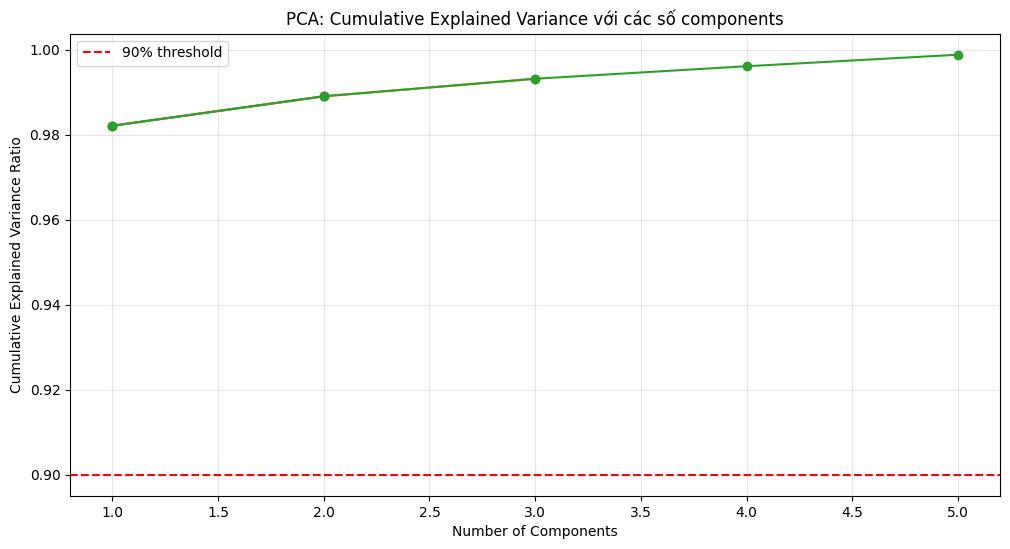

In [82]:

# Áp dụng PCA với different components
n_components_list = [2, 3, 5]
pca_results = {}

for n_comp in n_components_list:
    if n_comp <= df_scaled.shape[1]:
        pca = PCA(n_components=n_comp)
        X_pca = pca.fit_transform(df_scaled)
        
        # Tạo DataFrame cho kết quả PCA
        pca_columns = [f'PC{i+1}' for i in range(n_comp)]
        df_pca = pd.DataFrame(X_pca, columns=pca_columns, index=df_scaled.index)
        
        pca_results[n_comp] = {
            'data': df_pca,
            'explained_variance_ratio': pca.explained_variance_ratio_,
            'cumulative_variance': pca.explained_variance_ratio_.cumsum()
        }
        
        print(f"\n--- PCA với {n_comp} components ---")
        print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
        print(f"Cumulative explained variance: {pca.explained_variance_ratio_.cumsum()[-1]:.4f}")

# Vẽ biểu đồ explained variance cho các PCA đã tạo (2, 3, 5 components)
plt.figure(figsize=(12, 6))

for n_comp, result in pca_results.items():
    plt.plot(
        range(1, n_comp + 1),
        result['cumulative_variance'],
        marker='o',
        # label=f"{n_comp} components"
    )

# Thêm đường ngưỡng 90%
plt.axhline(y=0.9, color='r', linestyle='--', label='90% threshold')

plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA: Cumulative Explained Variance với các số components')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


